### Detect and Crop face
1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [21]:
def detect_faces(image_gray, image_rgb):
    face_cascade = cv2.CascadeClassifier('assets/detector_architectures/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image_gray, 1.01, 5)
    for x,y,w,h in faces:
        cv2.rectangle(image_rgb, (x,y), (x+w+10, y+h+10), (255,0,0), 2)
    return (faces, image_rgb)


def draw_faces(faces, image):
    index = 0
    plotnum = np.size(faces, 0)
    print("Total Faces Detected -->", plotnum)
    gs = gridspec.GridSpec(1, plotnum)
    fig = plt.figure(figsize=(20,20))
    for x,y,w,h in faces:
        im = image[y:y+h, x:x+w]
        ax = fig.add_subplot(gs[index])
        ax.imshow(im)
        if index < faces.shape[0]:
            index += 1

## Detect faces on image

Total Faces Detected --> 3


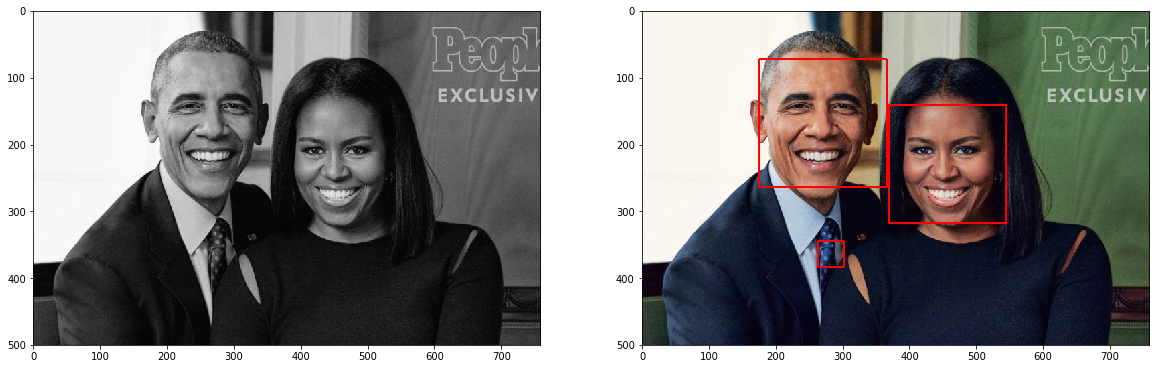

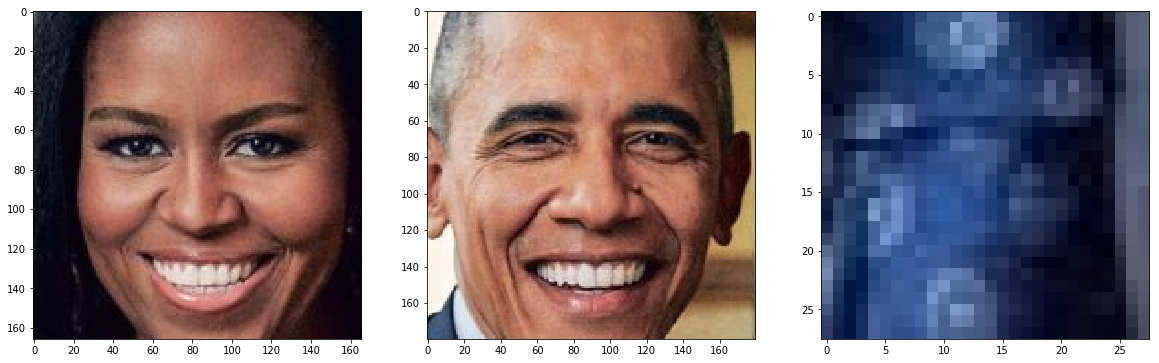

In [22]:
imagefile = 'assets/obamas.jpg'
img = cv2.imread(imagefile)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_rgb_copy = np.copy(img_rgb)
img_gray_copy = np.copy(img_gray)

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img_gray_copy, cmap='gray')

faces, image_rgb_copy = detect_faces(img_gray_copy, img_rgb_copy)
ax2.imshow(img_rgb_copy)

draw_faces(faces, img_rgb)

## Trying something more difficult

Total Faces Detected --> 41


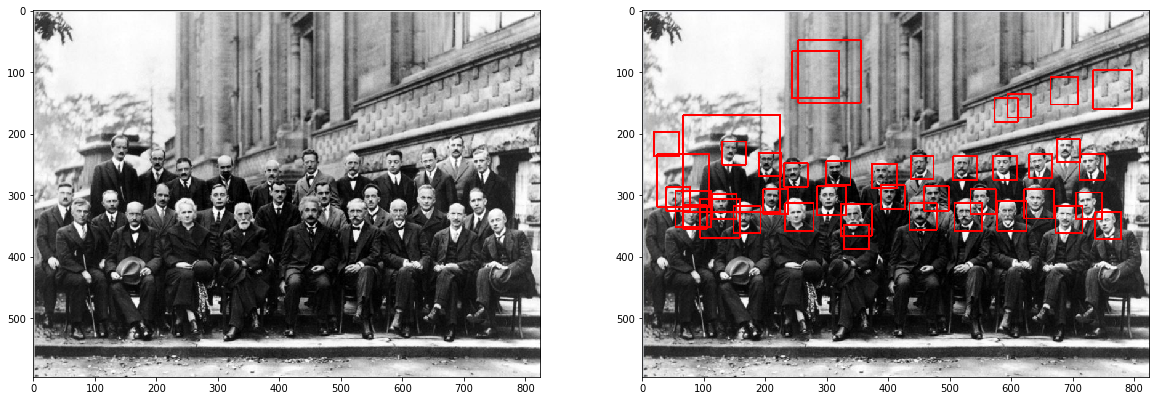

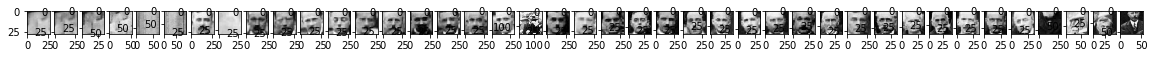

In [23]:
imagefile = 'assets/scientists.jpg'
img = cv2.imread(imagefile)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_rgb_copy = np.copy(img_rgb)
img_gray_copy = np.copy(img_gray)

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img_gray_copy, cmap='gray')

faces, image_rgb_copy = detect_faces(img_gray_copy, img_rgb_copy)
ax2.imshow(img_rgb_copy)

draw_faces(faces, img_rgb)

In above example we can see that there is an false positive 